# The Job Hunt: A Quantitative Approach

One of my hats is mentoring aspiring data scientists in the SharpestMinds program. Probably the most common question that comes up during these mentorships is how to get a data science job. Now, there are no shortage of opinions on the internet about how to go about doing this. One thing often lacking in these opinions in my opinion is a lack of quantitative justification. This is data science, after all, where data and models should rule the day. 

It's thus my goal in this, my first ever blog post, to offer a very simple quantitative way to think about the job search process. The ideas here aren't new by any means, and require only a simple understanding of probability theory (which the typical data scientist aspiree should have). That said, this post is definitely intended for the more quantitatively minded, so mathphobes beware...

At its root, the goal of the job hunt is to get an offer you're willing to accept. Unless you're insanely picky, the hardest part of this is actually getting the offer. We thus will assume that your goal in the job hunt is to generate offers. To do so we will attempt to figure out roughly how many jobs you need to apply to before you can expect to get an offer, and to try to minimize that number as much as possible. 

Let's represent "receiving an offer" by the random variable $o$ and its probability function by $p=p(o)$. Since getting an offer is a binary event (either you get an offer or you don't), $o \in \{0,1\}$ is a Bernoulli random variable with probability $p$. Note $p$ shouldn't be that hard to estimate. From basic statistics, we know that we can estimate $p$ as a frequency by applying for a bunch of jobs and estimating which fraction of those we get offers for, so
$$p \approx \frac{\# offers}{\# applied}.$$
Alternatively, we can adopt a Bayesian view and estimate $p$ via prior knowledge.

If we know $p$ then we can easily figure out how many jobs we can need to apply to to receive an offer. Suppose you apply to a sequence of $n$ jobs, each of which either does or doesn't generate an offer. Assuming these job applications are independent and have roughly the same probability $p$ of success (a simplifying assumption, no doubt, but bear with me), then we can think of this problem as a Binomial random variable $Bin(n,p)$. 

Now we have to be careful about exactly what we're asking for. One thing you can ask is the following: How many jobs should you apply to before you can _expect_ to get at least 1 offer? This is simple. Since the mean of a binominal rv is given by $np$, we can set $np=1$ to get $n=\frac{1}{p}$. Thus, to answer our question we replace the equality with an inequality to yield $n\geq\frac{1}{p}$. That is, you should apply to _at least_ $\frac{1}{p}$ jobs.

Of course, means can be deceiving. What you may really care about is that you can expect an offer with a certain degree of confidence. For example, you may want a 95% confidence of receiving at least 1 offer. In this, we can use our Binomial model a slightly different way. Recall that for a Binomial rv we have
$$ P(x\geq 1) = 1 - P(x=0) = 1 - (1-p)^n.$$
The left hand side $P(x\geq 1)$ is our confidence, which we denote by $C$. This is something we fix in advance, usually like 90% or 95% or something like that. Thus, if we know $p$ and $C$, we can estimate $n$ by
$$ n = \frac{\log(1-C)}{\log(1-p)}.$$
This formula answers a slightly different question than the previous one: How many jobs should I apply to if I want a C% confidence of receiving at least 1 offer, assuming I know $p$?

Example: Suppose you think you have a 1% chance of getting an offer. Then $p=0.01$, and so you should expect to apply to $n=\frac{1}{0.01}=100$ jobs to get an offer. This is a mean, however. Suppose what you really want is a 95% confidence of receiving an offer. Then $n = \log(1-0.95)/\log(1-0.01) \approx 298$. Thus, you should apply to almost 300 jobs if you want a 95% chance of an offer, but only have a 1% chance of getting any one offer!

Unfortunately just trying to estimate $p$ directly has some problems. One problem is that it doesn't provide much in the way of insight to the job hunter, who also wants to know what he can do to improve his chances of getting an offer. We can try to offer some insight here with the _chain rule of probability_. Recall that in its simplest form this rule says that $p(y) = p(x)p(y|x)$. 

We can use this to do the following: Suppose that a particular job hunt consists of two stages: getting an interview and getting an offer. We can again think of these as Bernoulli rv's, denoted $i$ and $o$ respectively. Then we have $p(o) = p(i)p(o|i)$. We can see then that having a good chance at getting an offer depends on two things: Getting yourself an interview, and having a good enough interview to get yourself an offer. Moreover, these two things are in some sense orthogonal. Moral: You can boost your chances of getting an offer either by independently boosting your chances of getting an interview, or by boosting your ability to get an offer once interviewed (i.e. interviewing well).

Note the above chain rule formulation is more practically useful for estimating $p(o)$ as well, as you often have data in chain rule form. You may have a rough idea of what fraction of job applications you get interviews for, and what fraction of the ones you interview for that you manage to get an offer from. For example, suppose you think (either based on data or prior knowledge) that you have a 5% chance of getting an interview, and a 5% chance of getting an offer for a company you interview for. Then by the chain rule you have a $p=(0.05)^2=0.0025$ or 0.25% chance of getting an offer among all companies you apply for (depressing, right?).

These formulas suggest two strategies job hunters can adopt to get an offer. The first is the naive approach: just play the numbers game. If you apply to enough, eventually you will get an offer. Of course if your odds of an offer are already pretty low, eventually could mean doing a _whole_ lot of job applications. Since you have to fill out so many applications, your incentive here is to adopt the "templated" approach to cut the time per application down and thus maximize the number of jobs you can apply for. This can be depressing for both applicants and hiring managers, because essentially what this does is throws tons of noise into the pool on both sides. Applicants have to fill out more applications, and hiring managers have to screen more applicants.

The second approach is suggested by the chain rule: Think smart, not hard. Getting an offer depends on two big things, getting an interview and doing well enough in the interview to get an offer. Thus, by adopting a smarter strategy, instead of playing the numbers game you can focus on improving your chances of getting an offer. And you can do this in two ways: Improving and better leveraging your network, which will lead to more interviews, and improving your interview skills. 

By improving and better leveraging your network, you should be able to get $p(i) \rightarrow 1$ over time. This alone can work wonders for you. Observe in the above example that by setting $p(i)=1$ you improve the chance of an offer by 20x!

By improving your interview skills, you should be able to improve $p(o|i)$ substantially. Note it may be quite improve $p(o|i)$ past a certain point due to the inherent noise in the job selection process, but you should be able to make substantial progress here with the right kinds of practice.

Aside: Since the chain rule is quite general, this can be extended to multiple interview rounds as well. Let $i_j$ denote the $j^{th}$ interview round with $j=1,\cdots,n+1$ and $o \equiv i_{n+1}$. Then we have
$$ p(o) = \prod_{j=1}^n p(i_{j+1}|i_j) = p(i_1)p(i_2|i_1)\cdots p(i_n|i_{n-1})p(o|i_n).$$
As an example, suppose a job has a 3-stage interview process: a phone screen $i_1$, a technical interview $i_2$, and a final on-site interview $i_3$. You estimate based on research into the company that $p(i_1)=0.05, p(i_2|i_1)=0.8, p(i_3|i_2)=0.3, p(o|i_3)=0.05$. Then
$$ p(o) = p(i_1)p(i_2|i_1)p(i_3|i_2) = (0.05)(0.8)(0.3)(0.05) = 0.06,$$
so you'd have a 6% chance of getting an offer if you applied.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
p = np.random.binomial(100,0.01,1000)
np.mean(p)

1.0840000000000001

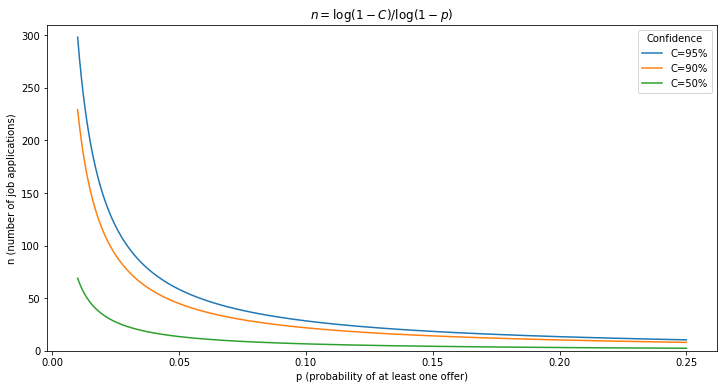

In [3]:
p = np.linspace(0.01,0.25,1000)
# C = 0.95

plt.figure(figsize=(12,6))
plt.plot(p, np.log(1-0.95)/np.log(1-p), label='C=95%')
plt.plot(p, np.log(1-0.9)/np.log(1-p), label='C=90%')
# plt.plot(p, np.log(1-0.99)/np.log(1-p), label='99%')
plt.plot(p, np.log(1-0.5)/np.log(1-p), label='C=50%')
plt.xlabel('p (probability of at least one offer)')
plt.ylabel('n (number of job applications)')
plt.ylim(0,310)
plt.title('$n = \log(1-C)/\log(1-p)$')
plt.legend(title='Confidence')
plt.show()